<a href="https://colab.research.google.com/github/YashkumarBhatt/Data_Analytics_Projects/blob/main/Urban_Mobility_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'cyclistic-bike-data-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F6639389%2F10712037%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20250821%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20250821T112601Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da29ce4ace1bea9163286eb83b1e38befdea72716b4f808db248d7aa336e8012709a7150e75eb0b87b3531a77e02cb9901640421484de56d8c616b7db0cc494ba17d3ef6f18e14dfb1eec6ba107d34299cae30f499dd0c40a582b47b641829fad8dfebfc2faff508d6bcfeeb2b7a1675655ac3780337418a67c46d96b5a50adceb178a35d6c3a51c8d6981c879a0e909418ebc9b917416b5c97cd3c1dc41ecb601d51bf781fdc9a61b59cd2ef157aed828906f375c6fe044ab50d9901ca62b2a9fc1591b63acb04f7a27ad819253a0ca1ff8ed964f124d8930f31cba3c9eb4f07914cb4ac97e5a274a5834c1ed5d28f445702df26534abc95ce212855dfb03247'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: cyclistic-bike-data-2024"
[1] "Downloaded and uncompressed: cyclistic-bike-data-2024"
[1] "Data source import complete"


* This project analyzes the annual bike sharing data of the year 2024 of **the Cylstic bike sharing company** operating in the city of Chicago.

* **The aim of the analysis to identify the differences of the two types of users: Members and Cassual Riders** (non-members) using the bikes to determine wheather the marketing team should focus on designing a campain to onboard the casual riders as member to expand the business.

* R programming is used for this purpose as the dataset is too large to be handled by the spreadsheet software. The full code has been the result of trial, resoving the errors and flounding the internet to get the relevent documentation.

* The required packged are installed and imported into the script to initiate the analysis.

In [ ]:
#Installing the requid paclges
install.packages('tidyverse')
install.packages('janitor')
install.packages('lubridate')
install.packages('ggplot2')
install.packages('scales')
install.packages('dplyr')

#Calling the required packges
library('tidyverse')
library('janitor')
library('lubridate')
library('ggplot2')
library('scales')
library('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http

* The data used comes from the company's website: https: //divvy-tripdata.s3.amazonaws.com/index.html

* The licence to use and share the data can b viewed here: https://divvy-tripdata.s3.amazonaws.com/index.html

* The monthly data is saved as individual csv files which will be later combined into one file for easier analysis.

In [ ]:
#Importing the raw data
January2024 <-read.csv("//kaggle/input/cyclistic-bike-data-2024/202401-divvy-tripdata.csv")
February2024 <-read.csv("/kaggle/input/cyclistic-bike-data-2024/202402-divvy-tripdata.csv")
March2024 <-read.csv("/kaggle/input/cyclistic-bike-data-2024/202403-divvy-tripdata.csv")
April2024 <-read.csv("/kaggle/input/cyclistic-bike-data-2024/202404-divvy-tripdata.csv")
May2024 <-read.csv("/kaggle/input/cyclistic-bike-data-2024/202405-divvy-tripdata.csv")
June2024 <-read.csv("/kaggle/input/cyclistic-bike-data-2024/202406-divvy-tripdata.csv")
July2024 <-read.csv("/kaggle/input/cyclistic-bike-data-2024/202407-divvy-tripdata.csv")
August2024 <-read.csv("/kaggle/input/cyclistic-bike-data-2024/202408-divvy-tripdata.csv")
September2024 <-read.csv("/kaggle/input/cyclistic-bike-data-2024/202409-divvy-tripdata.csv")
October2024 <-read.csv("/kaggle/input/cyclistic-bike-data-2024/202410-divvy-tripdata.csv")
November2024 <-read.csv("/kaggle/input/cyclistic-bike-data-2024/202411-divvy-tripdata.csv")
December2024 <-read.csv("/kaggle/input/cyclistic-bike-data-2024/202412-divvy-tripdata.csv")

* Viewing the data to check for any discrepancies in column names or data types to get the initial idea.

In [ ]:
# Viewing the data
str(January2024)
str(February2024)
str(March2024)
str(April2024)
str(May2024)
str(June2024)
str(July2024)
str(August2024)
str(September2024)
str(October2024)
str(November2024)
str(December2024)

'data.frame':	144873 obs. of  13 variables:
 $ ride_id           : chr  "C1D650626C8C899A" "EECD38BDB25BFCB0" "F4A9CE78061F17F7" "0A0D9E15EE50B171" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at        : chr  "2024-01-12 15:30:27" "2024-01-08 15:45:46" "2024-01-27 12:27:19" "2024-01-29 16:26:17" ...
 $ ended_at          : chr  "2024-01-12 15:37:59" "2024-01-08 15:52:59" "2024-01-27 12:35:19" "2024-01-29 16:56:06" ...
 $ start_station_name: chr  "Wells St & Elm St" "Wells St & Elm St" "Wells St & Elm St" "Wells St & Randolph St" ...
 $ start_station_id  : chr  "KA1504000135" "KA1504000135" "KA1504000135" "TA1305000030" ...
 $ end_station_name  : chr  "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Kingsbury St & Kinzie St" "Larrabee St & Webster Ave" ...
 $ end_station_id    : chr  "KA1503000043" "KA1503000043" "KA1503000043" "13193" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         

* Merging the monthly files as a single csv for further analysis.

In [ ]:
#Merging all the monthly files to a combined CSV
merged_df <- rbind(January2024, February2024, March2024, April2024, May2024, June2024, July2024, August2024, September2024, October2024, November2024, December2024)

* Next step is to format the time column to 'DD:MM:YYYY' and add a day of the week column.

In [ ]:
#Formatting the time from yyyy-dd-mm HH:MM:SS to the individual columns and adding a 'day_of_week' column
merged_df$date <-as.Date(merged_df$started_at)
merged_df$month <- format(as.Date(merged_df$date), "%b")
merged_df$day <-format(as.Date(merged_df$date), "%d")
merged_df$year <-format(as.Date(merged_df$date), "%Y")
merged_df$day_of_week <-format(as.Date(merged_df$date), "%A")
head(merged_df)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
1,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90327,-87.63474,41.88918,-87.63851,member,2024-01-12,Jan,12,2024,Friday
2,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90294,-87.63444,41.88918,-87.63851,member,2024-01-08,Jan,08,2024,Monday
3,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90295,-87.63447,41.88918,-87.63851,member,2024-01-27,Jan,27,2024,Saturday
4,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.88430,-87.63396,41.92182,-87.64414,member,2024-01-29,Jan,29,2024,Monday
5,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.94880,-87.67528,41.88918,-87.63851,member,2024-01-31,Jan,31,2024,Wednesday
6,C96080812CD285C5,classic_bike,2024-01-07 11:21:24,2024-01-07 11:30:03,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.90322,-87.63432,41.88918,-87.63851,member,2024-01-07,Jan,07,2024,Sunday


* From now onwards, the process of data cleaning starts with the removal of empty and duplicate rows.

In [ ]:
#Removing empty and duplicate rows
merged_df_NA_removed <- merged_df[merged_df$start_station_name != "" & merged_df$end_station_name != "", ]
merged_df_duplicates_removed <- merged_df_NA_removed[!duplicated(merged_df_NA_removed$ride_id), ]
print(paste("Removed", nrow(merged_df_NA_removed) - nrow(merged_df_duplicates_removed), "duplicate rows"))


[1] "Removed 121 duplicate rows"


* Creation of a column named **ride_length** to determine the time of ride.

In [ ]:
#Creating a column to determine the ride length in minutes
merged_df_V2 <- mutate(merged_df_duplicates_removed, ride_length = difftime(ended_at, started_at, units = "mins"))
colnames(merged_df_V2)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "date"               "month"             
[16] "day"                "year"               "day_of_week"       
[19] "ride_length"

* Filtering out trips with ride length less than 0 minutes.

In [ ]:
#Filtering trips with ride length <0
nrow(merged_df_V2[merged_df_V2$ride_length < 0,])
merged_df_V3 <- merged_df_V2[!merged_df_V2$ride_length <0,]
glimpse(merged_df_V3)

[1] 40

Rows: 4,208,148
Columns: 19
$ ride_id            <chr> "C1D650626C8C899A", "EECD38BDB25BFCB0", "F4A9CE7806…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <chr> "2024-01-12 15:30:27", "2024-01-08 15:45:46", "2024…
$ ended_at           <chr> "2024-01-12 15:37:59", "2024-01-08 15:52:59", "2024…
$ start_station_name <chr> "Wells St & Elm St", "Wells St & Elm St", "Wells St…
$ start_station_id   <chr> "KA1504000135", "KA1504000135", "KA1504000135", "TA…
$ end_station_name   <chr> "Kingsbury St & Kinzie St", "Kingsbury St & Kinzie …
$ end_station_id     <chr> "KA1503000043", "KA1503000043", "KA1503000043", "13…
$ start_lat          <dbl> 41.90327, 41.90294, 41.90295, 41.88430, 41.94880, 4…
$ start_lng          <dbl> -87.63474, -87.63444, -87.63447, -87.63396, -87.675…
$ end_lat            <dbl> 41.88918, 41.88918, 41.88918, 41.92182, 41.88918, 4…
$ end_lng            <dbl> -87.63851, -87.63851, -87.63851, -87.64414, -87.638…
$ member_cas

* This is the completion of data cleansing and now the analysis will start.
* Firstly, the determination of number of casual riders vs members is done.#Filtering trips with ride length <0
nrow(merged_df_V2[merged_df_V2$ride_length < 0,])
merged_df_V3 <- merged_df_V2[!merged_df_V2$ride_length <0,]
glimpse(merged_df_V3)


In [ ]:
#determining the number of members vs casual riders
rider_type_total <- table(merged_df_V3$member_casual)
View(rider_type_total)


 casual  member 
1521530 2686618 

* Statisical Analysis to get an overall idea of the data.

In [ ]:
#Performing statistical analysis
trip_stats <- merged_df_V3 %>%
  group_by(member_casual) %>%
  summarise(average_ride_length = mean(ride_length), standard_deviation = sd(ride_length), median_ride_length = median(ride_length), min_ride_length = min(ride_length), max_ride_length = max(ride_length))
head(trip_stats)

member_casual,average_ride_length,standard_deviation,median_ride_length,min_ride_length,max_ride_length
<chr>,<drtn>,<dbl>,<drtn>,<drtn>,<drtn>
casual,24.04422 mins,50.15088,13.410167 mins,0 mins,1509.367 mins
member,12.46997 mins,22.44620,8.816667 mins,0 mins,1497.650 mins


* To determine the mode of the weekday i.e., which day was the most popular for riding, there is a need to create the **getmode** function. [with the help of AI].

In [ ]:
#creating a function to determine mode of week (learnt from: tutorialspoint.com)
getmode <- function(v) {
  uniqv <- unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}
weekday_mode <- getmode(merged_df_V3$day_of_week)
print(weekday_mode)

[1] "Saturday"


* Now, determining the busiest day by the type of riders.

In [ ]:
#Determining the most popular day by type of rider
merged_df_V3$day_of_week <- ordered(merged_df_V3$day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
merged_df_V3 %>%
  group_by(member_casual,day_of_week) %>%
  summarise(rider_type_total = n(), average_ride_length = mean(ride_length)) %>%
  arrange(member_casual, day_of_week)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,rider_type_total,average_ride_length
<chr>,<ord>,<int>,<drtn>
casual,Monday,181663,23.18589 mins
casual,Tuesday,162831,20.62528 mins
casual,Wednesday,187363,21.35238 mins
casual,Thursday,183075,20.92583 mins
casual,Friday,222575,23.18230 mins
casual,Saturday,317847,27.27187 mins
casual,Sunday,266176,27.62767 mins
member,Monday,399247,11.88233 mins
member,Tuesday,421422,11.92936 mins


* Furthermore, determining the number of riders and average trip duration per month to get most popular month.

In [ ]:
#Determining the most popular month
popular_month <- merged_df_V3 %>%
  group_by(month) %>%
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>%
  arrange(-number_of_rides)
View(popular_month)


month,number_of_rides,average_duration
<chr>,<int>,<drtn>
Aug,541323,18.06756 mins
Jul,540941,19.08975 mins
Sep,536997,16.25294 mins
Jun,494342,19.06582 mins
Oct,449116,15.62978 mins
May,442164,18.43441 mins
Apr,297793,16.22353 mins
Nov,245932,12.89476 mins
Mar,230275,14.30086 mins


* Most popular station overall.

In [ ]:
#Finding the most popular station
station_mode <-getmode(merged_df_V3$start_station_name)
print(station_mode)

[1] "Streeter Dr & Grand Ave"


Most popular station for casual riders.

In [ ]:
#Determining the most popular station for casual riders
popular_start_station_casual <- merged_df_V3 %>%
  filter(member_casual == 'casual') %>%
  group_by(start_station_name) %>%
  summarise(number_of_starts = n()) %>%
  filter(start_station_name != "") %>%
  arrange(-number_of_starts)
head(popular_start_station_casual)

start_station_name,number_of_starts
<chr>,<int>
Streeter Dr & Grand Ave,48315
DuSable Lake Shore Dr & Monroe St,32194
Michigan Ave & Oak St,23296
DuSable Lake Shore Dr & North Blvd,21360
Millennium Park,20840
Shedd Aquarium,20114


* Similarly, determining the most popular station for members.

In [ ]:
#Determining the most popular station for members
popular_start_station_members <- merged_df_V3 %>%
  filter(member_casual == 'member') %>%
  group_by(start_station_name) %>%
  summarise(number_of_starts = n()) %>%
  filter(start_station_name != "") %>%
  arrange(-number_of_starts)
head(popular_start_station_members)

start_station_name,number_of_starts
<chr>,<int>
Kingsbury St & Kinzie St,26807
Clinton St & Washington Blvd,25167
Clinton St & Madison St,22644
Clark St & Elm St,22403
Clinton St & Jackson Blvd,18636
Wells St & Concord Ln,18129


* Finally, the analysis part is complete. Saving the final file for further visualization and future use.

In [ ]:
#Saving the final version as csv
write_csv(merged_df_V3, "/kaggle/working/cyclistic-bike-data-2024.csv")

* Creating a graph to show casual vs members' total trips.

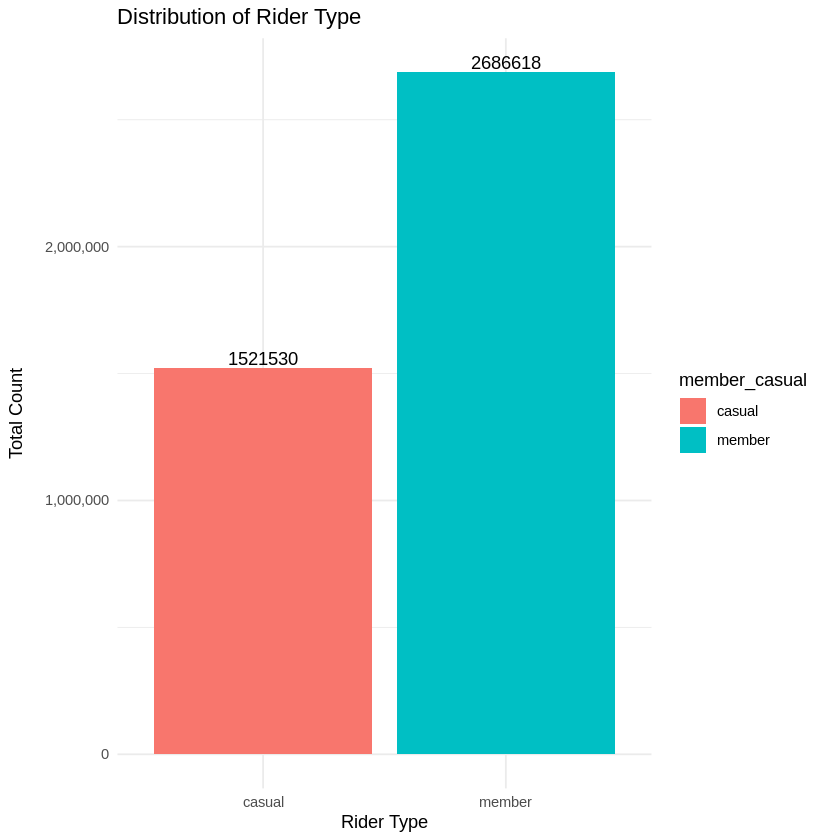

In [ ]:
#Visualization of rider types
merged_df_V3 %>%
  group_by(member_casual)%>%
  summarise(total_rider_type= n())%>%
  ggplot(aes(x = member_casual, y = total_rider_type, fill = member_casual)) + geom_col(position = "dodge") + geom_text(aes(label = total_rider_type), vjust = -0.25)+
  scale_y_continuous(labels = comma) +  # Ensures large numbers are displayed as integers
  labs(title = "Distribution of Rider Type",
       x = "Rider Type",
       y = "Total Count") +
  theme_minimal()

* Bar grpah shwoing average ride length per rider type.

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


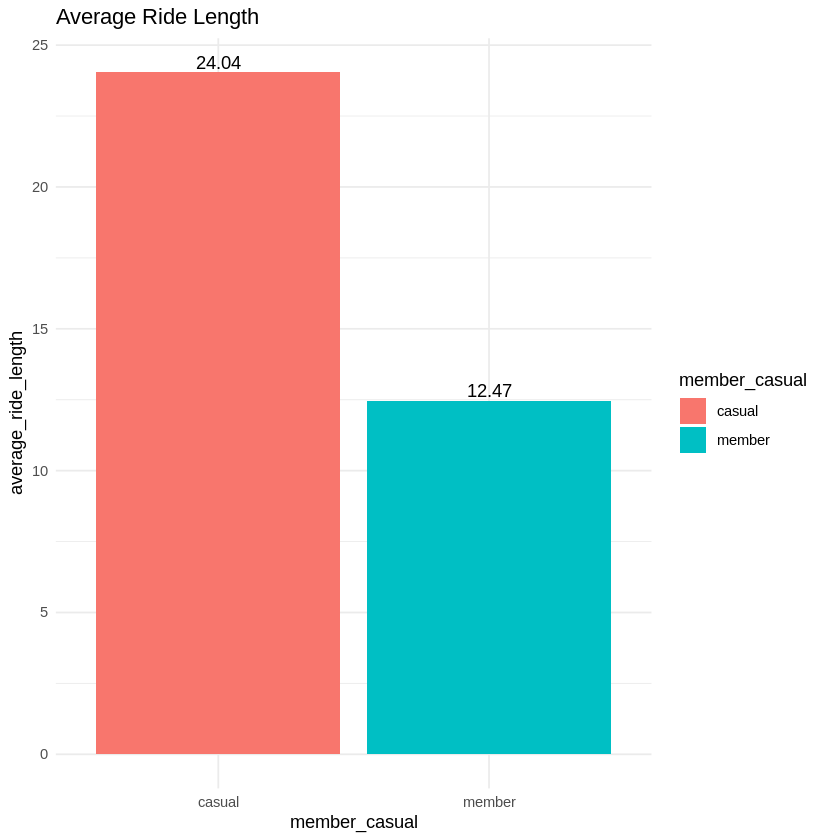

In [ ]:
#Visualization of average ride length
rider_type_average_duration <- merged_df_V3 %>%
  group_by(member_casual) %>%
  summarise(average_ride_length = round(mean(ride_length), 2))
rider_type_average_duration %>%
  ggplot(aes(x = member_casual, y = average_ride_length, fill = member_casual)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = average_ride_length), vjust = -0.25) +
  labs(title = "Average Ride Length") +  # Add title
  theme_minimal()

* Graoh of average ride length by the day of the week.

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


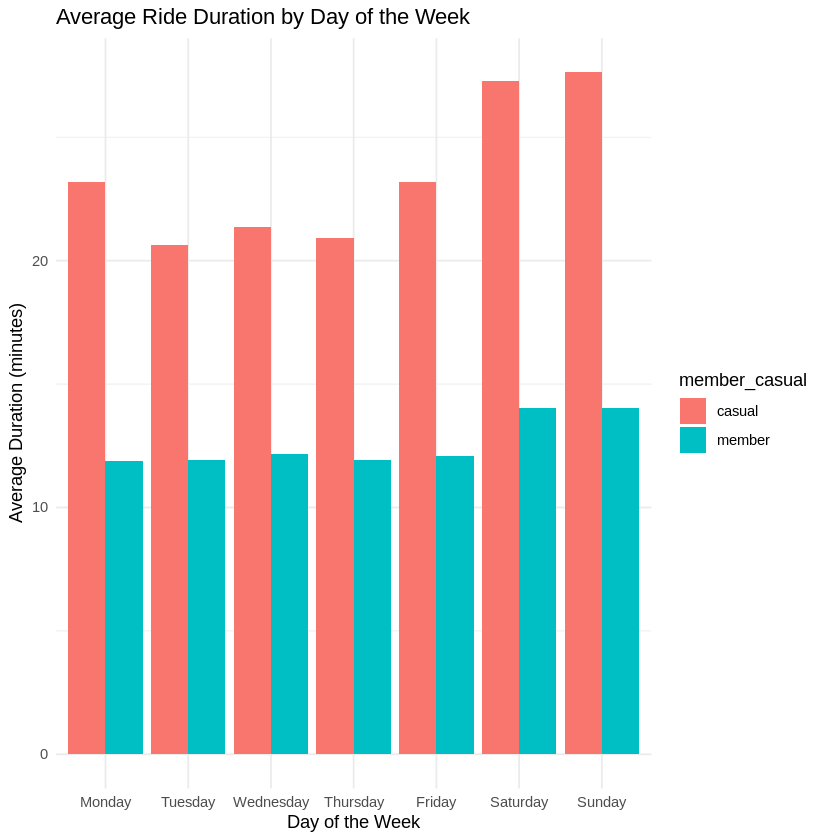

In [ ]:
#Visualization of average ride length by the weekday
day_levels <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

merged_df_V3 %>%
  group_by(member_casual, day_of_week) %>%
  summarise(number_of_riders = n(),
            average_duration = mean(ride_length),
            .groups = "drop") %>%
  mutate(day_of_week = factor(day_of_week, levels = day_levels)) %>%
  ggplot(aes(x = day_of_week, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average Ride Duration by Day of the Week",
       x = "Day of the Week",
       y = "Average Duration (minutes)") +
  theme_minimal()

* Graph showing how mwmber and casual riders use the bikes monthwise.

Warning message in geom_col(position = "dodge", stat = "identity"):
“Ignoring unknown parameters: `stat`”


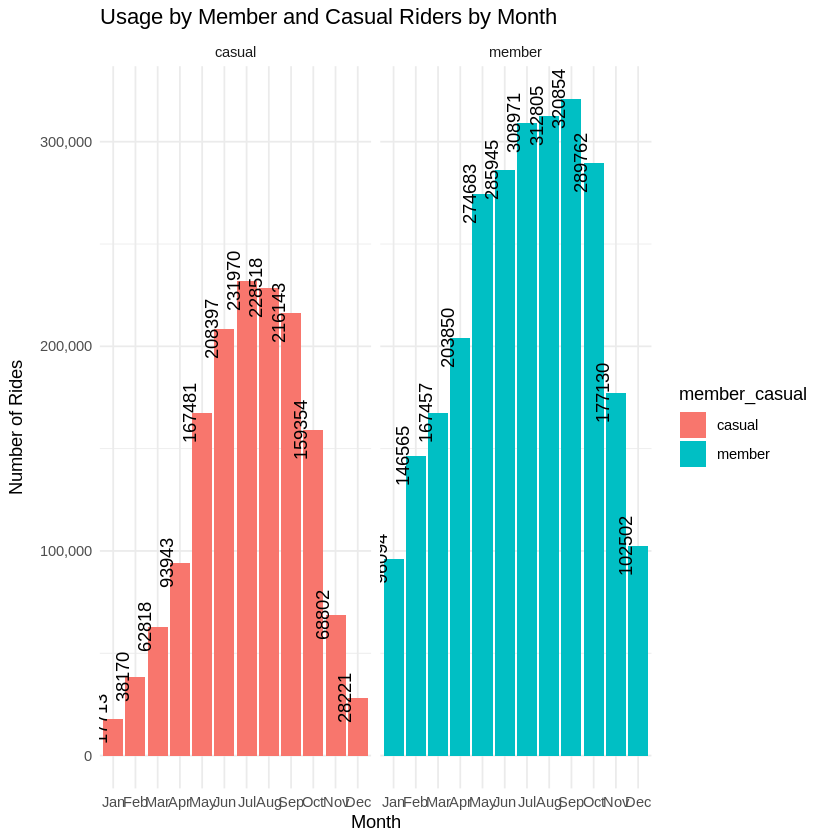

In [ ]:
#Visualization of the usage by member and casual riders by the months
merged_df_V3$month <- factor(merged_df_V3$month, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

merged_df_V3 %>%
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n(), average_duration = mean(ride_length), .groups = "drop") %>%
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge", stat = "identity") +
  geom_text(aes(label = number_of_rides), angle = 90, vjust = -0.5) +
  facet_wrap(~member_casual) +
  scale_y_continuous(labels = comma) +
  labs(title = "Usage by Member and Casual Riders by Month",
       x = "Month",
       y = "Number of Rides") +
  theme_minimal()

* Total number of trips taken by the type of rider each month.

Warning message in geom_col(position = "dodge", stat = "identity"):
“Ignoring unknown parameters: `stat`”


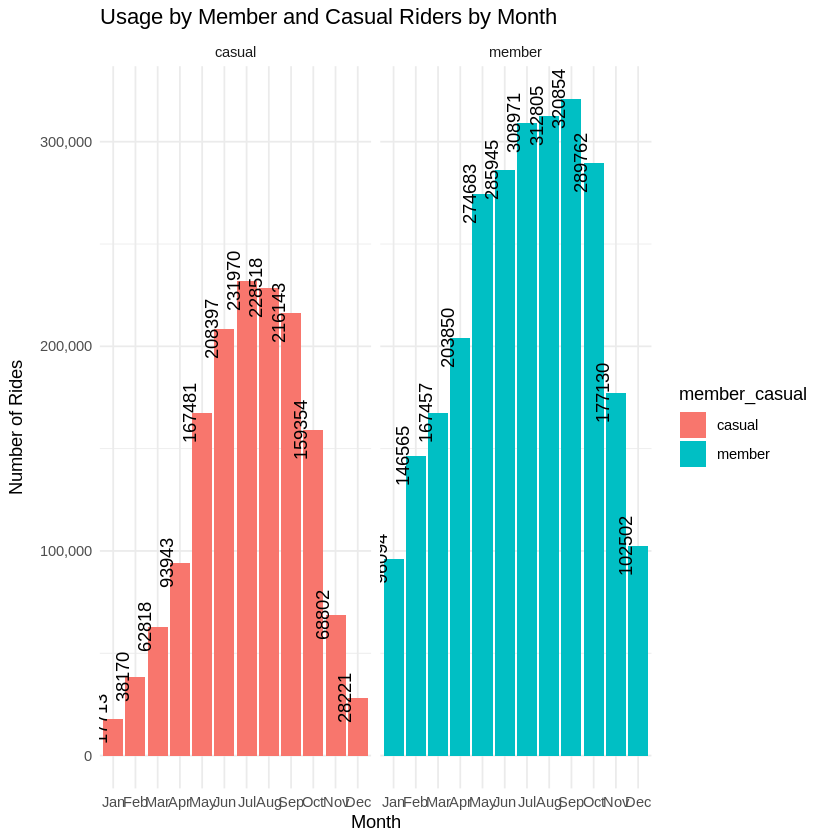

In [ ]:
#Visualization of number of trips by the rider type by month
merged_df_V3$month <- factor(merged_df_V3$month, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

merged_df_V3 %>%
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n(), .groups = "drop") %>%
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge", stat = "identity") +
  geom_text(aes(label = number_of_rides), angle = 90, vjust = -0.5) +
  facet_wrap(~member_casual) +
  scale_y_continuous(labels = comma) +
  labs(title = "Usage by Member and Casual Riders by Month",
       x = "Month",
       y = "Number of Rides") +
  theme_minimal()

* Average trip duration of both the rider types per month.

Warning message in geom_col(position = "dodge", stat = "identity"):
“Ignoring unknown parameters: `stat`”
Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


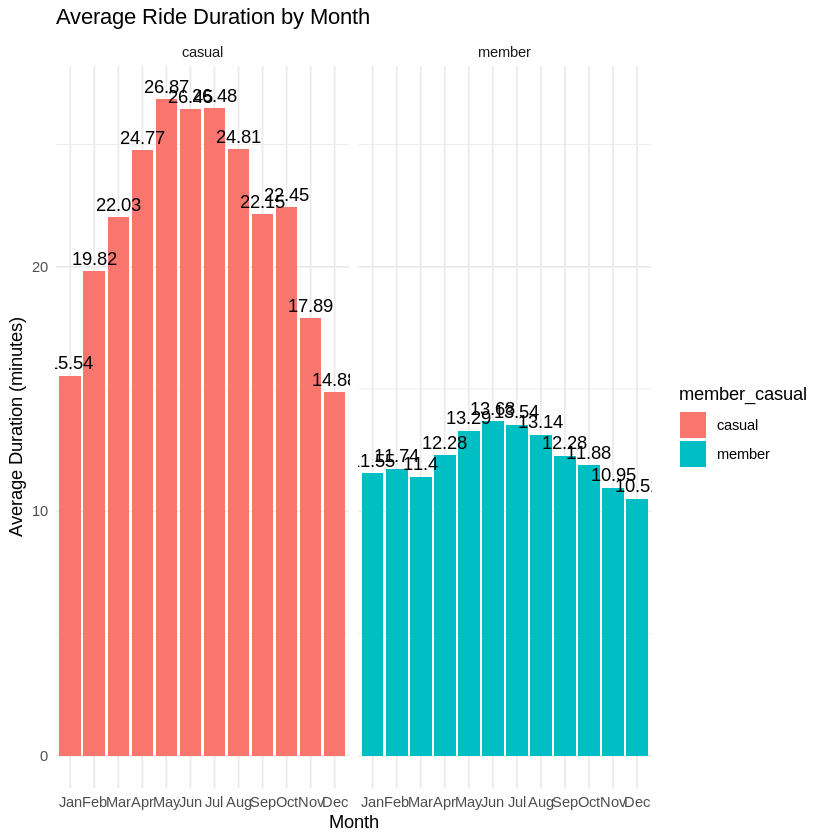

In [ ]:
# Visualization of the usage by members and casual riders by the month
merged_df_V3$month <- ordered(merged_df_V3$month, levels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

merged_df_V3 %>%
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n(), average_duration = mean(ride_length), .groups = "drop") %>%
  ggplot(aes(x = month, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge", stat = "identity") +
  geom_text(aes(label = round(average_duration, 2)), vjust = -0.5) +
  facet_wrap(~member_casual) +
  scale_y_continuous(labels = comma) +
  labs(title = "Average Ride Duration by Month",
       x = "Month",
       y = "Average Duration (minutes)") +
  theme_minimal()

* From this analysis, we can **conclude** the following.

1. There were a total of **4,208,148** rides taken during the year.
2. Out of these **2,686,618** rides were taken by non-members i.e., **casual riders** and the remaining **1,521,530** rides were taken by **members**.
3. The **average ride duration** of **casual riders** was **24.04 mins** which was almost double the **members** who spent **12.47 mins** on average.
4. Further into monthly analysis, the month of **July** had the highest number of casual riders whereas members' number spiked in **September**.
5. Looking at the graph, it can be seen that both saw similar trends: the rides gradually increase with the beginning of the year and peak around almost the mid of the year. Hence, the months of **June to September see the highest traffic** and therefore the resources can be arranged accordingly.
6. The analysis of the weekly breakdown of the data reveals that **Wednesday was the most popular month** for the **casual riders** with 4,469,02 rides being taken and **Saturday saw the highest number of members** traffic with 3,138,47 rides.
7. On the contrary, **Sunday had the longest average trip duration** (27.63 minutes) for **casual riders** Whereas the longest average trip duration for **members** came on **Saturday** (14.02 minutes).
8. Looking at the trends there is a **clear indication** that **casual riders use the bike sharing facility more than the members** and also spend more time on average.
9. Therefore, it is recommended that the marketing campaign should focus on attracting these casual riders to become members and the data provided above can be used to identify the peak season and days in order to provide the best service.
10. A presentation of this case study outlinging the findings and recommendations is availble by request: **yashbhatt01@yahoo.com**